In [1]:
import numpy as np
import matplotlib.pyplot as plt
#import scipy as sp

#### Code Overview

1. Define functions for important parameters used in the two waveform generation such as chirp mass
2. Define a function for non-evolving fgw that takes in masses, fgw, theta, phi, and r (which im taking as distance to source) and returns h_plus, h_cross, and combined h_plus + h_cross strain amplitudes
3. Define a function that accounts for change in fgw?

In [2]:
#Chirp Mass Calculator - enter masses as solar mass multiples
def chirp_mass(m1, m2):
    sol_mass = 1.989*10e30
    mass1 = sol_mass*m1
    mass2 = sol_mass*m2
    
    m_chirp = ( ((mass1*mass2)**(3/5)) / ( (mass1+mass2)**(1/5) ))
    return m_chirp

#strain calculator at constant frequency - enter distance in pc
def constant_f_strain_waveform(m1, m2, f_gw, duration, dt, r, theta, phi):
    
    #parameters to define
    M_c = chirp_mass(m1,m2)
    G = 6.67e-11
    c = 3.0*10e8
    distance = r*(3.0857*10e16)
    A = (4.0/distance)*((G*M_c) / (c**2))**(5/3)
    
    #define a array of time values
    t = np.arange(0, duration, dt)
    
    #compute retarded time
    t_ret = t - (distance/c)
    
    #compute strain amplitudes
    h_plus = A*(((np.pi*f_gw)/c)**(2/3)) * (1+(np.cos(theta))**2) * 0.5 * np.cos(2*np.pi*f_gw*t_ret+2*phi)
    h_cross = A*(((np.pi*f_gw)/c)**(2/3)) * np.cos(theta) * np.sin(2*np.pi*f_gw*t_ret+2*phi)
    
    h_combined = h_plus + h_cross
    return t, h_plus, h_cross

#strain calculation with increasing frequency
def chirp_strain_waveform(m1, m2, f_lower, dt, r, theta, phi):
    
    #parameters to define
    M_c = chirp_mass(m1,m2)
    G = 6.67e-11
    c = 3.0*10e8
    distance = r*(3.0857*10e16)
    A = (4.0/distance)*((G*M_c) / (c**2))**(5/3)
    
    #procedure seems to be:
    #1 - find time_until_coalescence for the lower frequency bound 
    #2 - use this to create a tau vector of length of time until coalescence 
    #3 - evaluate f over the tau vector
    #4 - evaluate waveform
    
    #1
    time_until_coalescence = 2.18*((1.21*1.989*10e30)/M_c)**(5/3) * (100/f_lower)**(8/3)
    print('duration (s):', time_until_coalescence, '(min):', time_until_coalescence/60)
    print('df:', 1.0/time_until_coalescence)
    
    #2 
    t = np.arange(0, int(time_until_coalescence), dt)
    tau = int(time_until_coalescence) - t
    #print(tau[-2:], type(tau))
    #print(np.shape(tau))
    
    #3
    f_gw = (1/np.pi)*((5/256)*(1/tau))**(3/8) * ((G*M_c)/(c**3))**(-5/8)
    #print(type(f_gw))
    #print(np.shape(f_gw))
    
    #4
    t_ret = t - (distance/c)
    #print(np.shape(t_ret))
    
    h_plus = A*(((np.pi*f_gw)/c)**(2/3)) * (1+(np.cos(theta))**2) * 0.5 * np.cos(2*np.pi*f_gw*t_ret+2*phi)
    h_cross = A*(((np.pi*f_gw)/c)**(2/3)) * np.cos(theta) * np.sin(2*np.pi*f_gw*t_ret+2*phi)
    #print(np.shape(h_plus), np.shape(h_cross))
    
    return t, h_plus, h_cross

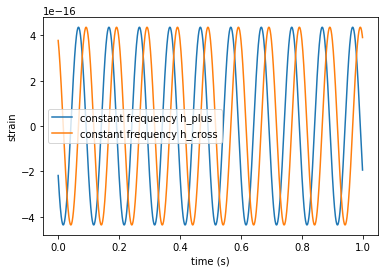

In [3]:
##plot outputs of functions to check

#constant_f_strain_waveform(m1, m2, f_gw, duration, dt, r, theta, phi)
times, plus, cross = constant_f_strain_waveform(100, 100, 10, 1, 0.001, 1, 0, 0)

plt.plot(times, plus, label='constant frequency h_plus')
plt.plot(times, cross, label='constant frequency h_cross')
plt.xlabel('time (s)')
plt.ylabel('strain')
plt.legend()
plt.show()


In [3]:
#chirp_strain_waveform(m1, m2, f_gw, dt, r, theta, phi)
times, plus, cross = chirp_strain_waveform(100, 100, 1, 0.0001, 1, 0, 0)

duration (s): 377.37701303550716 (min): 6.289616883925119
df: 0.002649869932342463


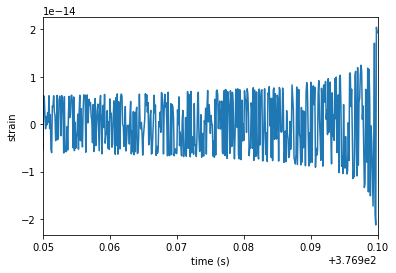

In [4]:
plt.plot(times, plus, label='h_plus chirp')
plt.xlabel('time (s)')
plt.ylabel('strain')
plt.xlim(376.95, 377)
#plt.legend()
plt.savefig("strange_waveform.png")
plt.show()

#### Everything below here is test code

"plot tau and f_gw each to see if they are varying smoothly

the bug is from something in the cosine signal"


In [15]:
def taylor_cosine_apprx(f, t):
    x = 2.0*np.pi*f*t
    cosine_array = 1.0 - (x**2)/2.0 + (x**4)/(4.0*6.0) - (x**6)/(36.0*20.0)
    return cosine_array

def testing_strain_waveform(m1, m2, f_lower, dt, r, theta, phi):
    
    #parameters to define
    M_c = chirp_mass(m1,m2)
    G = 6.67e-11
    c = 3.0*10e8
    distance = r*(3.0857*10e16)
    A = (4.0/distance)*((G*M_c) / (c**2))**(5/3)
    
    #procedure seems to be:
    #1 - find time_until_coalescence for the lower frequency bound 
    #2 - use this to create a tau vector of length of time until coalescence 
    #3 - evaluate f over the tau vector
    #4 - evaluate waveform
    
    #1
    time_until_coalescence = 2.18*((1.21*1.989*10e30)/M_c)**(5/3) * (100/f_lower)**(8/3)
    print('duration (s):', time_until_coalescence, '(min):', time_until_coalescence/60)
    print('df:', 1.0/time_until_coalescence)
    
    #2 
    t = np.arange(0, int(time_until_coalescence), dt)
    tau = int(time_until_coalescence) - t
    #print(np.shape(tau))
    
    #3
    f_gw = (1/np.pi)*((5/256)*(1/tau))**(3/8) * ((G*M_c)/(c**3))**(-5/8)
    #print(type(f_gw))
    #print(np.shape(f_gw))
    
    #4
    t_ret = t - (distance/c)
    #print(np.shape(t_ret))
    
    h_plus = A*(((np.pi*f_gw)/c)**(2/3)) * (1+(np.cos(theta))**2) * 0.5 * np.cos(2*np.pi*f_gw*t_ret+2*phi)
    h_cross = A*(((np.pi*f_gw)/c)**(2/3)) * np.cos(theta) * np.sin(2*np.pi*f_gw*t_ret+2*phi)
    #print(np.shape(h_plus), np.shape(h_cross))
    
    return t, tau, f_gw, t_ret, h_plus, h_cross

In [7]:
#testing_strain_waveform(m1, m2, f_lower, dt, r, theta, phi)
t_array, tau_array, fgw_array, t_ret_array, plus, cross = testing_strain_waveform(100, 100, 1, 0.1, 1, 0, 0)

#print(t_ret_array)

if isinstance(t_ret_array[0], complex):
    print('complex')

duration (s): 377.37701303550716 (min): 6.289616883925119
df: 0.002649869932342463


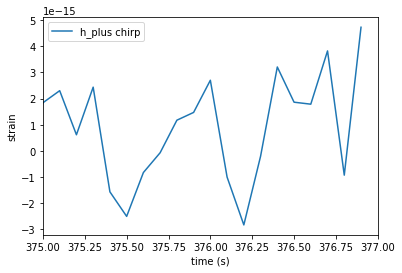

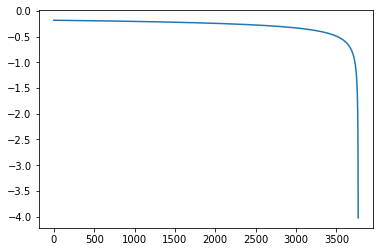

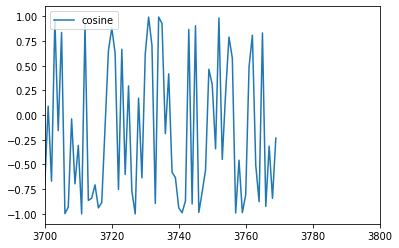

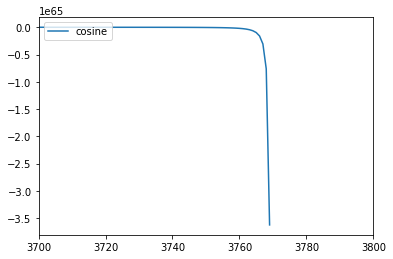

In [17]:
#plot entire plus polarization strain 
plt.plot(t_array, plus, label='h_plus chirp')
plt.xlabel('time (s)')
plt.ylabel('strain')
plt.legend(loc='upper left')
plt.xlim(375, 377)

#plotting product of f_gw and t_ret to see if it's smooth
plt.figure()
plt.plot(fgw_array*t_ret_array/1e10)
#plt.xlim(3760, 3770)

#plotting the cosine/sign term of strain amplitude
plt.figure()
plt.plot( np.cos((fgw_array*t_ret_array)), label='cosine')
plt.legend(loc='upper left')
plt.xlim(3700, 3800)

#trying simple taylor approx
plt.figure()
plt.plot(taylor_cosine_apprx(fgw_array, t_ret_array), label='cosine')
plt.legend(loc='upper left')
plt.xlim(3700, 3800)

plt.show()

3770 (3770,)
376.90000000000003 377.0


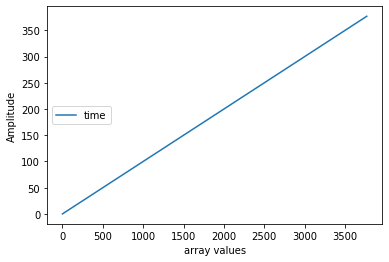

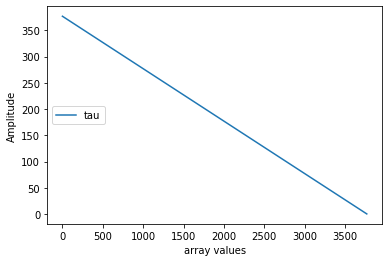

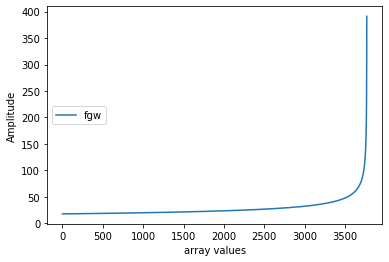

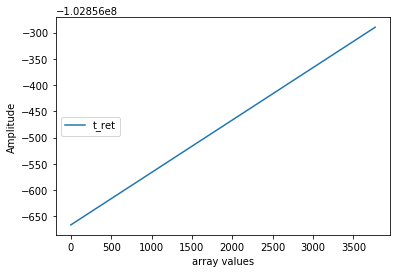

In [46]:
print(np.size(tau_array), np.shape(tau_array))
print(t_array[-1], tau_array[0])

for key, item in {'time':t_array, 
                 'tau':tau_array,
                 'fgw':fgw_array,
                 't_ret':t_ret_array}.items():
    plt.figure()
    plt.plot(item, label=str(key))
    plt.xlabel('array values')
    plt.ylabel('Amplitude')
    plt.legend(loc='center left')


plt.show()

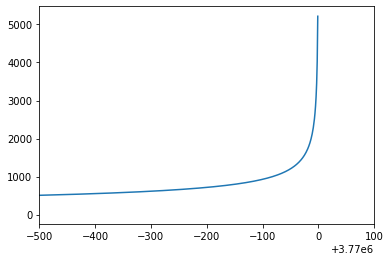

In [38]:
plt.plot(fgw_array)
plt.xlim(37695e2, 37701e2)
plt.show()